

### **Atividade Pr√°tica - Modelagem de dados**

A prepara√ß√£o de dados √© um dos passos mais importantes em um pipeline de Machine Learning. Dados brutos geralmente apresentam problemas como valores ausentes, vari√°veis em escalas diferentes, distribui√ß√µes enviesadas ou categorias que precisam ser codificadas. Esses problemas podem impactar negativamente tanto a visualiza√ß√£o quanto o desempenho dos algoritmos.

Esta atividade pr√°tica guiar√° voc√™ atrav√©s das principais t√©cnicas de prepara√ß√£o de dados e mostrar√° como cada uma pode ser usada para melhorar modelos e facilitar a an√°lise dos dados. Al√©m disso, exploraremos como normaliza√ß√£o pode auxiliar na visualiza√ß√£o de padr√µes e rela√ß√µes em gr√°ficos.

Ao final desta atividade, voc√™ ser√° capaz de:

1. Identificar e tratar valores ausentes.
2. Codificar vari√°veis categ√≥ricas com diferentes abordagens.
3. Normalizar e padronizar dados num√©ricos.
4. Aplicar transforma√ß√µes de escala para melhorar a visualiza√ß√£o de dados.
5. Comparar m√©todos e analisar vantagens e limita√ß√µes de cada abordagem.

### **Configura√ß√£o do Ambiente**

**Importa√ß√£o de Bibliotecas**

In [ ]:
# Importa√ß√£o de bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_classification, make_blobs
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
)
from sklearn.impute import SimpleImputer
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Configura√ß√£o de estilo
sns.set(style="whitegrid")


**Carregamento de Dados**

**Dataset Real**

O dataset Credit-G, dispon√≠vel no reposit√≥rio OpenML, cont√©m informa√ß√µes sobre clientes e √© amplamente utilizado para tarefas de classifica√ß√£o relacionadas √† concess√£o de cr√©dito. O principal objetivo do dataset √© prever se um cliente √© considerado um bom ou mau pagador com base em caracter√≠sticas pessoais, financeiras e comportamentais.

**Descri√ß√£o Geral**

*   √â composto por 20 vari√°veis independentes (features) e uma vari√°vel alvo (target).

*  Atributos num√©ricos e categ√≥ricos, como: Status financeiro do cliente, Modo de pagamento de d√≠vidas e etc.


*   A vari√°vel target indica se o cliente foi classificado como: Good (Bom Pagador) ou Bad (Mau Pagador)



In [ ]:
# Carregar dataset do OpenML
data = fetch_openml(name="credit-g", as_frame=True)
df = data.data
df["target"] = data.target
df.head()



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   property_magnitude age  other_payment_plans   housing existing_credits  \
0         real estate  67                 none       own                2   
1         real estate  22                 none       own                1   
2         real estate  49                 none       own                1   
3      life insurance  45                 none  for free                1   
4   no known property  53                 none  for free                2   

                  job num_dependents  own_telephone foreign_worker target  
0             skilled              1            yes            yes   good  
1             skilled              1           none            yes    bad  
2  unskilled resident              2           none            yes   good  
3             skilled              2           none            yes   good  
4             skilled              2           none            yes    bad  

[5 rows x 21 columns]

**Dataset Sint√©tico**

A fun√ß√£o *make_classification* da *scikit-learn* √© projetada para criar datasets sint√©ticos de classifica√ß√£o com configura√ß√µes de controle detalhadas, como o n√∫mero de caracter√≠sticas, a separabilidade das classes, a quantidade de ru√≠do e a complexidade da tarefa. Isso permite que voc√™ simule cen√°rios espec√≠ficos e controle os par√¢metros do dataset para testar como diferentes t√©cnicas de aprendizado de m√°quina se comportam.

**Vantagens de Utilizar Dados Sint√©ticos:**

**Custo Zero:** N√£o √© necess√°rio coletar, limpar ou obter dados reais, que podem ser caros ou dif√≠ceis de acessar.

**Controle Total:** Voc√™ pode definir exatamente como deseja que seus dados se comportem (como introduzir desbalanceamento ou valores ausentes).

**Seguran√ßa e Privacidade:** Ao usar dados sint√©ticos, voc√™ evita quest√µes de privacidade, especialmente em setores como sa√∫de, onde os dados podem ser altamente sens√≠veis.

**Reprodutibilidade:** Dados sint√©ticos podem ser facilmente gerados para reproduzir testes e cen√°rios espec√≠ficos.

In [ ]:
# Criar dataset sint√©tico com sklearn
n_features = 5
X, y = make_classification(n_samples=1000, n_features=n_features,n_classes = 2,random_state=42)
df_synthetic = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, n_features+1)])
df_synthetic["target"] = y

# Introduzindo valores ausentes (NaN) nas colunas de caracter√≠sticas aleatoriamente
nan_indices = np.random.choice(df_synthetic.index, size=int(df.shape[0] * 0.1), replace=False)
df_synthetic.loc[nan_indices, 'feature_1'] = np.nan  # Adicionando NaN em 'Feature_1'

nan_indices = np.random.choice(df_synthetic.index, size=int(df.shape[0] * 0.08), replace=False)
df_synthetic.loc[nan_indices, 'feature_2'] = np.nan  # Adicionando NaN em 'Feature_2'

# Exibindo as primeiras linhas do DataFrame gerado
df_synthetic



feature_1  feature_2  feature_3  feature_4  feature_5  target
0    -0.439643   0.542547  -0.822420   0.401366  -0.854840       0
1          NaN  -2.480859  -1.147691  -2.101131   3.040278       1
2     1.618386  -1.369478  -2.084113  -1.179659   1.613602       1
3     1.659048  -0.615202   1.112688  -0.835098  -0.272205       1
4     1.849824  -1.679456  -0.926698  -1.402509   2.123129       1
..         ...        ...        ...        ...        ...     ...
995  -0.766350   0.768369   1.039112   0.615481  -1.056899       0
996        NaN   1.841002  -1.239107   1.805803  -1.450448       0
997   1.560390  -0.229041  -0.234408  -0.619576  -1.109856       1
998   0.886925  -0.222946  -1.308820  -0.396177  -0.404278       0
999  -2.747104   1.850430  -0.193826   1.777419  -1.580834       0

[1000 rows x 6 columns]

### **Tratamento de Valores Ausentes**

Identificar valores ausentes √© essencial para compreender a qualidade dos dados. Muitas t√©cnicas, como algoritmos de aprendizado de m√°quina, n√£o funcionam bem com dados incompletos.

In [ ]:
df_synthetic.isnull().sum()


feature_1    100
feature_2     80
feature_3      0
feature_4      0
feature_5      0
target         0
dtype: int64

**Indentificando a distribui√ß√£o de classes**

In [ ]:
df_synthetic['target'].value_counts()

target
0    500
1    500
Name: count, dtype: int64

**Remo√ß√£o de Linhas Valores Ausentes.**

In [ ]:
df_cleaned = df_synthetic.dropna()
df_cleaned['target'].value_counts()

target
1    422
0    403
Name: count, dtype: int64

**Imputa√ß√£o de Valores Ausentes**

A imputa√ß√£o preenche valores ausentes com estat√≠sticas descritivas (m√©dia, mediana ou moda).

**Vantagens:**

Preserva o tamanho do dataset.
R√°pido e f√°cil de implementar.

**Limita√ß√µes:**

Pode introduzir vi√©s.
Ignora rela√ß√µes entre vari√°veis no dataset.

In [ ]:
# Imputar valores ausentes com a m√©dia
imputer = SimpleImputer(strategy="mean")
result_imputer = imputer.fit_transform(df_synthetic)
df_imputed = pd.DataFrame(result_imputer, columns=df_synthetic.columns)
df_imputed['target'].value_counts()
print("tamanho do dataset:", df_imputed.shape)
df_imputed.isnull().sum()

tamanho do dataset: (1000, 6)


feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

### Exerc√≠cio de Pr√©-processamento de Dados - Opcional


**Objetivo:**  
O objetivo deste exerc√≠cio √© criar um dataset sint√©tico, introduzir valores ausentes (NaN) e realizar o pr√©-processamento dos dados de duas formas: removendo as linhas com valores ausentes e utilizando o `SimpleImputer` para preench√™-los. O dataset deve ser gerado usando o `make_classification` da **scikit-learn**.

### Tarefas:
1. **Cria√ß√£o do Dataset Sint√©tico**:
   - Use o `make_classification` para gerar um dataset com 3 atributos de caracter√≠sticas e 1 coluna alvo com 3 poss√≠veis classes. Considere um dataset com 100 linhas.
   - Introduza valores ausentes (NaN) aleatoriamente nas colunas de atributos e na coluna alvo (target).
   - Certifique-se de que as colunas de atributos e a coluna alvo contenham valores ausentes.

2. **Pr√©-processamento do Dataset**:
   - **Remo√ß√£o de Linhas com NaN**: Utilize o m√©todo `dropna()` do pandas para remover as linhas com valores ausentes.
   - **Preenchimento com `SimpleImputer`**: Use o `SimpleImputer` da **scikit-learn** para preencher os valores ausentes. Aplique a imputa√ß√£o usando a **m√©dia** para as colunas de atributos num√©ricos e a **moda** para a coluna alvo.

### Instru√ß√µes:
- Importe as bibliotecas necess√°rias para o processo de cria√ß√£o do dataset e para o pr√©-processamento.
- Fa√ßa uso do `make_classification` para criar um dataset com 100 amostras e 3 classes.
- Introduza valores ausentes nas colunas de atributos e na coluna alvo.
- Realize os dois tipos de pr√©-processamento descritos acima.
- Exiba os resultados antes e depois da remo√ß√£o de linhas com NaN e do preenchimento com `SimpleImputer`.




In [ ]:
#Resposta
#cria√ß√£o do Dataset Sint√©tico

In [ ]:
#Resposta
#Pr√©-processamento do Dataset -  Remo√ß√£o de Linhas com NaN

In [ ]:
#Pr√©-processamento do Dataset - Preenchimento com SimpleImputer

### **Codifica√ß√£o de Vari√°veis Categ√≥ricas**

**Label Econding**

O Label Encoding mapeia categorias para n√∫meros inteiros, permitindo que os algoritmos processem essas vari√°veis como entradas num√©ricas. √â especialmente √∫til para vari√°veis ordinais.

**Vantagens:**

Simples e eficiente, com baixo custo computacional.
Preserva a ordem natural de vari√°veis ordinais.

**Limita√ß√µes:**

Pode introduzir ordens artificiais em vari√°veis nominais.
Algoritmos sens√≠veis √† magnitude podem interpretar incorretamente os valores.

In [ ]:
# Label Encoding para vari√°veis categ√≥ricas
le = LabelEncoder()
df["target_encoded"] = le.fit_transform(df["target"])
df


checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   
2              education           2096              <100      4<=X<7   
3    furniture/equipment           7882              <100      4<=X<7   
4                new car           4870              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment           1736              <100      4<=X<7   
996             used car           3857              <100      1<=X<4   
997             radio/tv            804              <100         >=7   
998             radio/tv           1845              <100      1<=X<4   
999             used car           4576        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  age  \
0                         4         male single          none  ...   67   
1                         2  female div/dep/mar          none  ...   22   
2                         2         male single          none  ...   49   
3                         2         male single     guarantor  ...   45   
4                         3         male single          none  ...   53   
..                      ...                 ...           ...  ...  ...   
995                       3  female div/dep/mar          none  ...   31   
996                       4        male div/sep          none  ...   40   
997                       4         male single          none  ...   38   
998                       4         male single          none  ...   23   
999                       3         male single          none  ...   27   

    other_payment_plans   housing existing_credits                        job  \
0                  none       own                2                    skilled   
1                  none       own                1                    skilled   
2                  none       own                1         unskilled resident   
3                  none  for free                1                    skilled   
4                  none  for free                2                    skilled   
..                  ...       ...              ...                        ...   
995                none       own                1         unskilled resident   
996                none       own                1  high qualif/self emp/mgmt   
997                none       own                1                    skilled   
998                none  for free                1                    skilled   
999                none       own                1                    skilled   

     num_dependents own_telephone  foreign_worker target target_encoded  
0                 1           yes             yes   good              1  
1                 1          none             yes    bad              0  
2                 2          none             yes   good              1  
3                 2          none             yes   good              1  
4                 2          none             yes    bad              0  
..              ...         

**One-Hot Encoding**

 O One-Hot Encoding transforma categorias em colunas bin√°rias, onde o valor 1 indica a presen√ßa da categoria. Isso elimina qualquer rela√ß√£o ordinal impl√≠cita nos dados. Nesse caso, o *get_dummies* do pandas √© uma alternativa pr√°tica para realizar One-Hot Encoding diretamente em dataframes, adicionando colunas bin√°rias para cada categoria.

**Vantagens:**

Evita interpreta√ß√£o incorreta de ordem e  √© ideal para vari√°veis nominais.

**Limita√ß√µes:**

Aumenta a dimensionalidad e pode complicar modelos em datasets muito grandes.

In [ ]:
# Aplicar One-Hot Encoding com pandas
df_encoded = pd.get_dummies(df, columns=["target"], prefix="encoded", drop_first=False)
df_encoded.head()



checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  age  \
0                       4         male single          none  ...   67   
1                       2  female div/dep/mar          none  ...   22   
2                       2         male single          none  ...   49   
3                       2         male single     guarantor  ...   45   
4                       3         male single          none  ...   53   

  other_payment_plans   housing existing_credits                 job  \
0                none       own                2             skilled   
1                none       own                1             skilled   
2                none       own                1  unskilled resident   
3                none  for free                1             skilled   
4                none  for free                2             skilled   

   num_dependents own_telephone  foreign_worker encoded_bad encoded_good  
0               1           yes             yes       False         True  
1               1          none             yes        True        False  
2               2          none             yes       False         True  
3               2          none             yes       False         True  
4               2          none             yes        True        False  

[5 rows x 22 columns]

### **Normaliza√ß√£o e Padroniza√ß√£o**

**StandardScaler**

A padroniza√ß√£o transforma os dados para que tenham uma m√©dia
ùúá
=
0
e um desvio padr√£o
ùúé
=1
Isso √© realizado pela f√≥rmula:

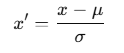


Essa t√©cnica √© essencial para algoritmos sens√≠veis √† escala, como regress√£o log√≠stica, SVMs e redes neurais, onde diferentes amplitudes entre vari√°veis podem afetar o desempenho.

**Vantagens:**

Desempenho Aprimorado: Melhora a converg√™ncia de algoritmos baseados em gradiente (como redes neurais).

Uniformidade de Escala.

In [ ]:
scaler = StandardScaler()
df[["credit_amount_norm_standard"]] = scaler.fit_transform(df[["credit_amount"]])
df.head()


checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  age  \
0                       4         male single          none  ...   67   
1                       2  female div/dep/mar          none  ...   22   
2                       2         male single          none  ...   49   
3                       2         male single     guarantor  ...   45   
4                       3         male single          none  ...   53   

  other_payment_plans   housing existing_credits                 job  \
0                none       own                2             skilled   
1                none       own                1             skilled   
2                none       own                1  unskilled resident   
3                none  for free                1             skilled   
4                none  for free                2             skilled   

   num_dependents own_telephone  foreign_worker target  \
0               1           yes             yes   good   
1               1          none             yes    bad   
2               2          none             yes   good   
3               2          none             yes   good   
4               2          none             yes    bad   

  credit_amount_norm_standard  
0                   -0.745131  
1                    0.949817  
2                   -0.416562  
3                    1.634247  
4                    0.566664  

[5 rows x 22 columns]

**Transforma√ß√£o Logar√≠timica**

A transforma√ß√£o logar√≠tmica √© amplamente usada para lidar com distribui√ß√µes altamente enviesadas, onde a maior parte dos dados se concentra em uma faixa estreita de valores, mas com algumas observa√ß√µes extremamente altas (outliers). A f√≥rmula b√°sica aplicada √©
ùë•
‚Ä≤
=
log
‚Å°
(
ùë•
+
1
)
, garantindo que valores zero ou negativos n√£o causem erros computacionais.

A transforma√ß√£o reduz a amplitude dos valores, comprimindo n√∫meros grandes e expandindo os pequenos, tornando a distribui√ß√£o mais sim√©trica. Isso √© particularmente √∫til em modelos baseados em regress√£o linear e outros algoritmos que assumem distribui√ß√µes normais para vari√°veis.

**Vantagens:**

Redu√ß√£o de Vi√©s: Diminui o impacto de outliers nos dados.

Melhoria de Modelagem: Dados transformados frequentemente atendem melhor √†s premissas de normalidade e linearidade.

Aplica√ß√£o Vers√°til: √ötil em vari√°veis como renda, pre√ßos, e outras m√©tricas que possuem distribui√ß√µes enviesadas.

**Limita√ß√µes:**

Perda de Intui√ß√£o: Os valores transformados podem ser menos interpret√°veis.

Depend√™ncia de Dados N√£o-Negativos: N√£o funciona em valores negativos sem ajustes espec√≠ficos (como deslocamentos constantes).

Rela√ß√£o N√£o Linear: Em alguns casos, a transforma√ß√£o pode distorcer rela√ß√µes entre vari√°veis, dificultando a interpreta√ß√£o dos coeficientes em modelos lineares.


In [ ]:
# Aplicando transforma√ß√£o logar√≠tmica
df[["credit_amount_norm_log"]] = np.log(df[["credit_amount"]])
df.head()

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   other_payment_plans   housing  existing_credits                 job  \
0                 none       own                 2             skilled   
1                 none       own                 1             skilled   
2                 none       own                 1  unskilled resident   
3                 none  for free                 1             skilled   
4                 none  for free                 2             skilled   

  num_dependents  own_telephone foreign_worker  target  \
0              1            yes            yes    good   
1              1           none            yes     bad   
2              2           none            yes    good   
3              2           none            yes    good   
4              2           none            yes     bad   

  credit_amount_norm_standard credit_amount_norm_log  
0                   -0.745131               7.063904  
1                    0.949817               8.691315  
2                   -0.416562               7.647786  
3                    1.634247               8.972337  
4                    0.566664               8.490849  

[5 rows x 23 columns]

**Min-Max**

Teoria:
A normaliza√ß√£o Min-Max transforma os dados para um intervalo fixo, geralmente entre 0 e 1. A f√≥rmula usada √©:

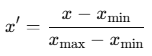

√â √∫til para algoritmos que dependem da magnitude dos dados.

**Vantagens:**

Manuten√ß√£o de Rela√ß√µes: Preserva a rela√ß√£o entre os valores originais.
Interpreta√ß√£o F√°cil: Os valores resultantes est√£o em um intervalo bem definido.

**Limita√ß√µes:**

Sensibilidade a Outliers: Outliers podem distorcer os resultados.
Depend√™ncia dos Limites: Requer conhecimento de
ùë•
min
x
min
‚Äã
  e
ùë•
max
x
max
‚Äã
  durante a infer√™ncia.

In [ ]:
scaler = MinMaxScaler()
df[["credit_amount_norm_min_max"]] = scaler.fit_transform(df[["credit_amount"]])
df.head()


checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...   housing  \
0                       4         male single          none  ...       own   
1                       2  female div/dep/mar          none  ...       own   
2                       2         male single          none  ...       own   
3                       2         male single     guarantor  ...  for free   
4                       3         male single          none  ...  for free   

  existing_credits                 job num_dependents own_telephone  \
0                2             skilled              1           yes   
1                1             skilled              1          none   
2                1  unskilled resident              2          none   
3                1             skilled              2          none   
4                2             skilled              2          none   

   foreign_worker target  credit_amount_norm_standard credit_amount_norm_log  \
0             yes   good                    -0.745131               7.063904   
1             yes    bad                     0.949817               8.691315   
2             yes   good                    -0.416562               7.647786   
3             yes   good                     1.634247               8.972337   
4             yes    bad                     0.566664               8.490849   

  credit_amount_norm_min_max  
0                   0.050567  
1                   0.313690  
2                   0.101574  
3                   0.419941  
4                   0.254209  

[5 rows x 24 columns]

**Whiten**

A normaliza√ß√£o pelo m√©todo whiten divide cada vari√°vel pela sua vari√¢ncia, assegurando que todas as vari√°veis tenham igual import√¢ncia no c√°lculo de dist√¢ncias. Isso √© particularmente √∫til em algoritmos de clustering, como K-means.

**Vantagens:**

Balanceamento de Vari√¢ncia: Evita que vari√°veis com maior vari√¢ncia dominem o modelo.
Compatibilidade com Clustering: Ideal para algoritmos como K-means.

**Limita√ß√µes:**

Informa√ß√£o Perdida: Remove informa√ß√µes de magnitude.
Depend√™ncia Estat√≠stica: A normaliza√ß√£o depende da vari√¢ncia, que pode ser sens√≠vel a outliers.

In [ ]:
# Normalizar dados com a fun√ß√£o whiten
df[["credit_amount_norm_whiten"]] = whiten(df[["credit_amount"]])
df.head()


checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   existing_credits                 job  num_dependents own_telephone  \
0                 2             skilled               1           yes   
1                 1             skilled               1          none   
2                 1  unskilled resident               2          none   
3                 1             skilled               2          none   
4                 2             skilled               2          none   

  foreign_worker  target credit_amount_norm_standard  credit_amount_norm_log  \
0            yes    good                   -0.745131                7.063904   
1            yes     bad                    0.949817                8.691315   
2            yes    good                   -0.416562                7.647786   
3            yes    good                    1.634247                8.972337   
4            yes     bad                    0.566664                8.490849   

  credit_amount_norm_min_max credit_amount_norm_whiten  
0                   0.050567                  0.414344  
1                   0.313690                  2.109293  
2                   0.101574                  0.742913  
3                   0.419941                  2.793723  
4                   0.254209                  1.726139  

[5 rows x 25 columns]

### **Aprimoramento da Visualiza√ß√£o de Dados com Normaliza√ß√£o**

**Min-Max**

Quando os dados possuem magnitudes diferentes, algumas vari√°veis podem dominar os gr√°ficos, dificultando a an√°lise visual. A normaliza√ß√£o Min-Max pode ajudar ao escalar todos os valores para o mesmo intervalo.

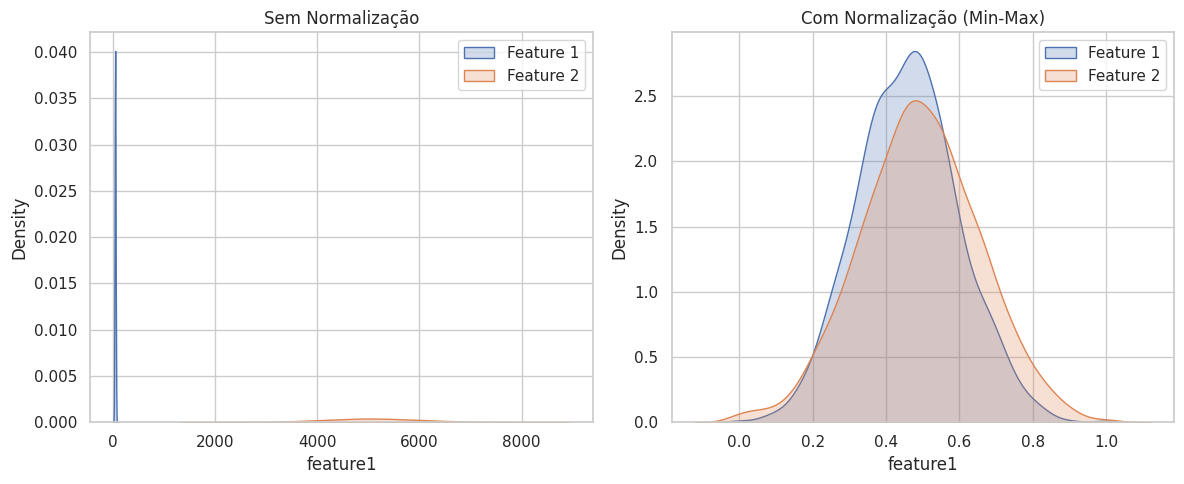

In [ ]:
# Gerando um conjunto de dados com diferentes magnitudes
np.random.seed(42)
data = pd.DataFrame({
    "feature1": np.random.normal(50, 10, 1000),
    "feature2": np.random.normal(5000, 1000, 1000)
})

# Visualiza√ß√£o sem normaliza√ß√£o
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data["feature1"], label="Feature 1", fill=True)
sns.kdeplot(data["feature2"], label="Feature 2", fill=True)
plt.title("Sem Normaliza√ß√£o")
plt.legend()

# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=["feature1", "feature2"])

# Visualiza√ß√£o com normaliza√ß√£o
plt.subplot(1, 2, 2)
sns.kdeplot(normalized_data["feature1"], label="Feature 1", fill=True)
sns.kdeplot(normalized_data["feature2"], label="Feature 2",fill=True)
plt.title("Com Normaliza√ß√£o (Min-Max)")
plt.legend()
plt.tight_layout()
plt.show()


**Normaliza√ß√£o Logar√≠tmica**

Vari√°veis com distribui√ß√µes altamente enviesadas podem dificultar a an√°lise visual, especialmente em histogramas ou gr√°ficos de densidade. A transforma√ß√£o logar√≠tmica pode reduzir o vi√©s. A transforma√ß√£o logar√≠tmica reduz a amplitude de valores grandes, compactando distribui√ß√µes enviesadas. Isso torna padr√µes visuais mais claros em gr√°ficos e facilita a an√°lise de tend√™ncias.

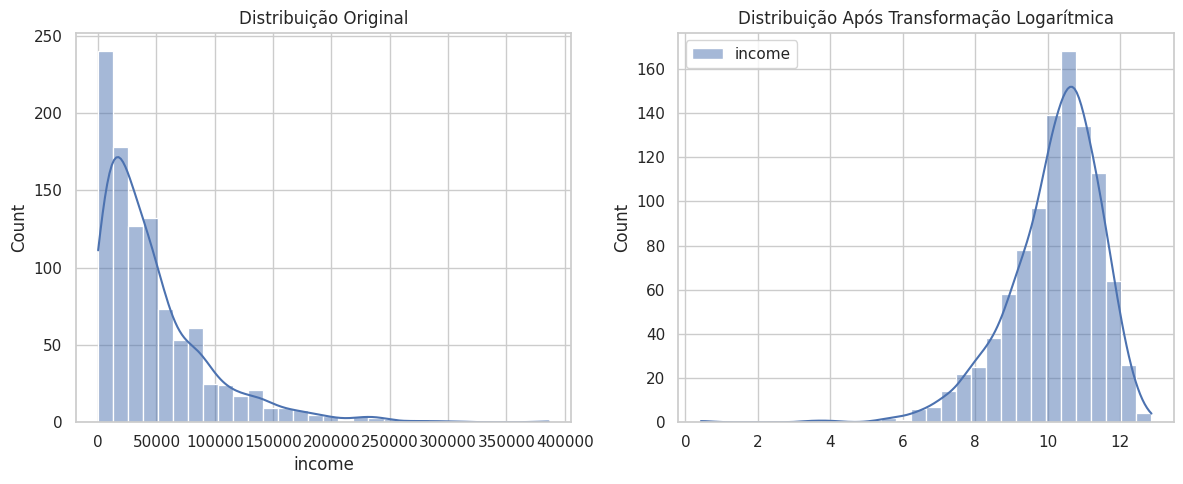

In [ ]:
# Gerando dados com distribui√ß√£o enviesada
skewed_data = pd.DataFrame({
    "income": np.random.exponential(scale=50000, size=1000)
})

# Visualiza√ß√£o sem transforma√ß√£o
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(skewed_data["income"], bins=30, kde=True)
plt.title("Distribui√ß√£o Original")

# Transforma√ß√£o logar√≠tmica
log_data = np.log(skewed_data)

# Visualiza√ß√£o ap√≥s transforma√ß√£o
plt.subplot(1, 2, 2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Distribui√ß√£o Ap√≥s Transforma√ß√£o Logar√≠tmica")
plt.tight_layout()
plt.show()


**StandardScaler**

Ao trabalhar com vari√°veis em diferentes unidades, como peso (kg) e altura (cm), a padroniza√ß√£o com m√©dia zero e desvio padr√£o um facilita a an√°lise visual conjunta. A padroniza√ß√£o transforma as vari√°veis para que tenham m√©dia zero e desvio padr√£o unit√°rio. Isso facilita a identifica√ß√£o de padr√µes e rela√ß√µes em gr√°ficos bidimensionais.

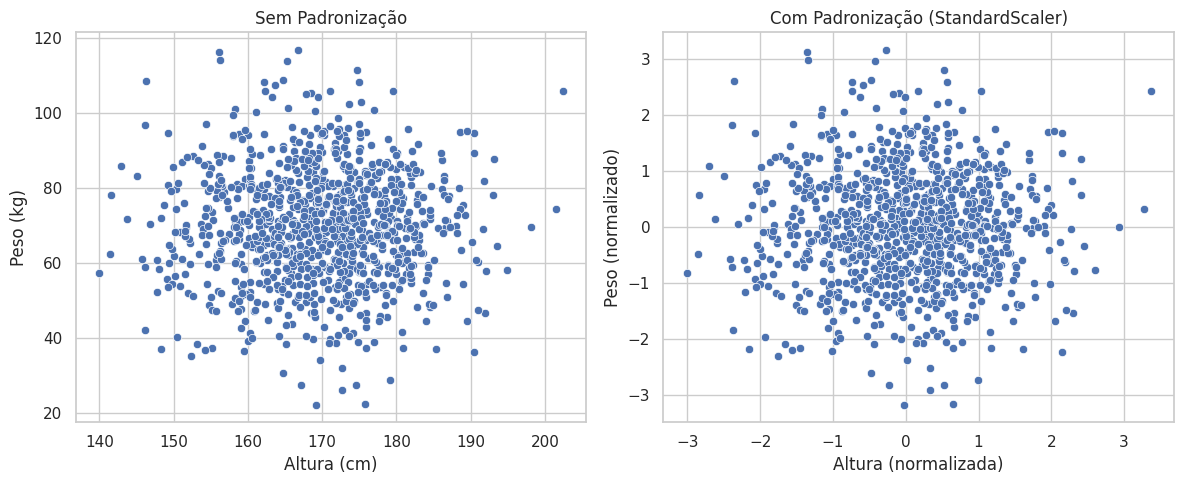

In [ ]:
# Criando um dataset com vari√°veis em diferentes escalas
data = pd.DataFrame({
    "height_cm": np.random.normal(170, 10, 1000),
    "weight_kg": np.random.normal(70, 15, 1000)
})

# Visualiza√ß√£o sem padroniza√ß√£o
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data["height_cm"], y=data["weight_kg"])
plt.title("Sem Padroniza√ß√£o")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")

# Padronizando os dados com StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data = pd.DataFrame(standardized_data, columns=["height", "weight"])

# Visualiza√ß√£o ap√≥s padroniza√ß√£o
plt.subplot(1, 2, 2)
sns.scatterplot(x=standardized_data["height"], y=standardized_data["weight"])
plt.title("Com Padroniza√ß√£o (StandardScaler)")
plt.xlabel("Altura (normalizada)")
plt.ylabel("Peso (normalizado)")
plt.tight_layout()
plt.show()


**Whiten**

A fun√ß√£o whiten ajusta os dados dividindo-os pela vari√¢ncia, igualando a contribui√ß√£o de cada vari√°vel em gr√°ficos de clusters. A normaliza√ß√£o com whiten assegura que cada vari√°vel contribua igualmente para a forma√ß√£o de clusters. Isso reduz o impacto de vari√°veis com maior vari√¢ncia.

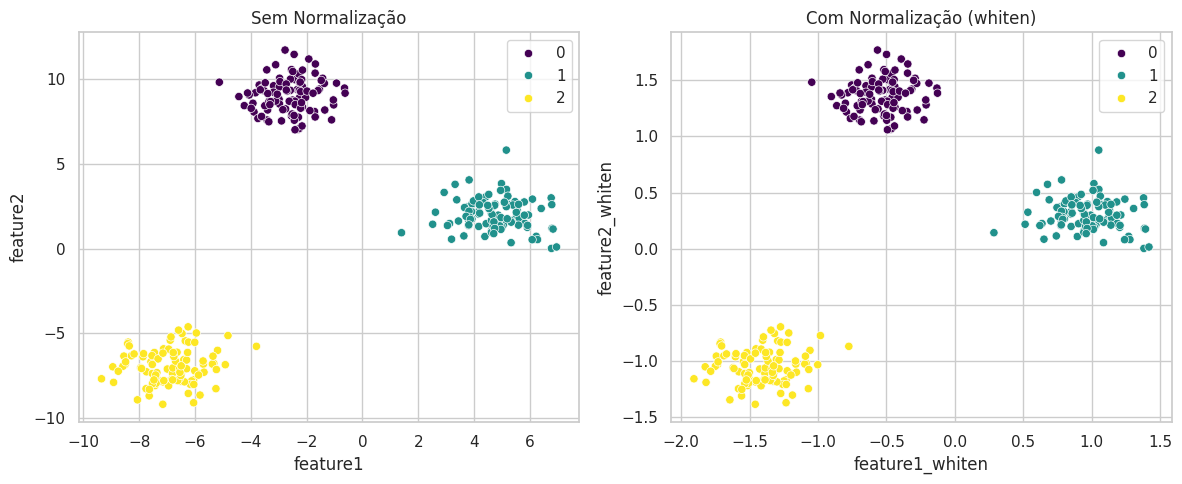

In [ ]:
# Gerando dados simulados para clustering
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=300, centers=3, random_state=42)
df = pd.DataFrame(data, columns=["feature1", "feature2"])

# Visualiza√ß√£o sem normaliza√ß√£o
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["feature1"], y=df["feature2"], hue=labels, palette="viridis")
plt.title("Sem Normaliza√ß√£o")

# Normaliza√ß√£o com whiten
df["feature1_whiten"] = whiten(df["feature1"])
df["feature2_whiten"] = whiten(df["feature2"])

# Visualiza√ß√£o com normaliza√ß√£o
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["feature1_whiten"], y=df["feature2_whiten"], hue=labels, palette="viridis")
plt.title("Com Normaliza√ß√£o (whiten)")
plt.tight_layout()
plt.show()


### **Aplica√ß√£o pr√°tica Geral** -  Aplicando Normaliza√ß√£o de Dados em um Problema de Previs√£o de Rendimento Escolar.

Neste exerc√≠cio, voc√™ aplicar√° t√©cnicas de normaliza√ß√£o de dados em um dataset sint√©tico que simula informa√ß√µes relacionadas ao rendimento escolar de alunos. O objetivo √© preparar os dados para aplica√ß√£o em algoritmos de Machine Learning e analisar como a normaliza√ß√£o afeta a visualiza√ß√£o e o comportamento dos dados.

**Cen√°rio:**

Voc√™ √© um cientista de dados encarregado de ajudar uma escola a prever o rendimento escolar de seus alunos com base em informa√ß√µes como tempo de estudo, n√∫mero de faltas e n√≠vel de participa√ß√£o em atividades extracurriculares. O dataset cont√©m valores em escalas diferentes, o que pode impactar negativamente os resultados de alguns algoritmos de aprendizado de m√°quina.

Seu trabalho √© normalizar esses dados para que fiquem em uma escala compar√°vel.

Tarefas:

1. Pr√©-processar os Dados:

  Preencha os valores ausentes (utilize a m√©dia ou mediana).
  Visualize os dados antes da normaliza√ß√£o usando gr√°ficos de dispers√£o e histogramas.

2. Aplicar T√©cnicas de Normaliza√ß√£o:

  Min-Max Scaling: Normalize os dados para uma faixa entre 0 e 1.
  Standard Scaling: Padronize os dados para uma distribui√ß√£o com m√©dia 0 e desvio padr√£o 1.
  Normaliza√ß√£o Logar√≠tmica: Aplique logaritmo em uma caracter√≠stica com valores muito dispersos.
  Use a t√©cnica Whiten (normaliza√ß√£o de matriz de covari√¢ncia esf√©rica) em uma c√≥pia do dataset.

3. Analisar os Efeitos da Normaliza√ß√£o:

  Compare os dados antes e depois da normaliza√ß√£o usando gr√°ficos.




**Gera√ß√£o do Dataset Proposto**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Configurando semente para reprodutibilidade
np.random.seed(42)

# Gerando dataset com 3 caracter√≠sticas (tempo de estudo, n√∫mero de faltas e participa√ß√£o)
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0,
                           n_classes=2, random_state=42)

# Convertendo X para DataFrame e adicionando a coluna alvo
df = pd.DataFrame(X, columns=['StudyTime', 'Absences', 'Participation'])
df['Performance'] = y  # Coluna alvo: rendimento escolar (0 = baixo, 1 = alto)

# Ajustando escalas para simular diferentes unidades
df['StudyTime'] = df['StudyTime'] * 10 + 50  # Tempo de estudo (em horas/semana)
df['Absences'] = df['Absences'] * 5 + 20     # N√∫mero de faltas
df['Participation'] = df['Participation'] * 100 + 500  # N√≠vel de participa√ß√£o

# Introduzindo valores ausentes (NaN) aleatoriamente
nan_indices = np.random.choice(df.index, size=15, replace=False)
df.loc[nan_indices, 'StudyTime'] = np.nan

nan_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[nan_indices, 'Absences'] = np.nan

nan_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[nan_indices, 'Participation'] = np.nan

# Visualizando as primeiras linhas do dataset com valores ausentes
print("Dataset Sint√©tico com Diferentes Escalas e Valores Ausentes:")
df.head()


Dataset Sint√©tico com Diferentes Escalas e Valores Ausentes:


StudyTime   Absences  Participation  Performance
0  52.242567  24.998171     585.249256            1
1  51.743773  27.311377     691.281149            1
2  54.434188  25.401373     447.921652            1
3  51.260363  23.742440     490.653427            1
4  52.626757  24.809743     508.245432            1

**Remo√ß√£o de Linhas com NaN**

In [ ]:
# Remo√ß√£o de linhas com valores ausentes
df_cleaned  =

**Preenchimento com M√©dia (SimpleImputer)**

In [ ]:
# Preenchendo os valores ausentes com a m√©dia das colunas
df_imputed =

**Normaliza√ß√£o dos Dados**

Min-Max Scaling

In [ ]:
df_minmax =

**Standard Scaling**

In [ ]:
df_standard =

**Normaliza√ß√£o Logar√≠tmica**

In [ ]:
df_log =

**Normaliza√ß√£o com Whiten**

df_whiten =

**Visualiza√ß√£o dos Dados**

In [ ]:
sns.pairplot(df_imputed, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Originais", y=1.02)
plt.show()


**Ap√≥s Min-Max Scaling**

In [ ]:
sns.pairplot(df_minmax, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Ap√≥s Min-Max Scaling", y=1.02)
plt.show()

**Ap√≥s Standard Scaling**

In [ ]:
#resposta


**Ap√≥s Normaliza√ß√£o Logar√≠tmica**

In [ ]:
#resposta

**Ap√≥s Whiten**

In [ ]:
#resposta